### Q2 . Train an SVM regressor on : Bengaluru housing dataset

    Must include in details:

  - EDA

  - Feature engineering 

In [3]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
# import csv file
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
# Checking missing values
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [13]:
### There are missing values in lots of columns

In [7]:
# Checking unique value
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
# Remove the string "BHK" from the 'size' column and replace it with an empty string ''
df['size'] = df['size'].str.replace("BHK", "")

unique_sizes = df['size'].unique()


In [9]:
print(unique_sizes)

['2 ' '4 Bedroom' '3 ' '4 ' '6 Bedroom' '3 Bedroom' '1 ' '1 RK'
 '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 ' '7 ' '6 '
 '5 Bedroom' '11 ' '9 ' nan '9 Bedroom' '27 ' '10 Bedroom' '11 Bedroom'
 '10 ' '19 ' '16 ' '43 Bedroom' '14 ' '8 ' '12 Bedroom' '13 ' '18 Bedroom']


In [10]:
# we have to remove Bedroom from the size column
df['size'] = df['size'].str.replace("Bedroom", "")

In [11]:
df['size'].unique()

array(['2 ', '4 ', '3 ', '6 ', '1 ', '1 RK', '8 ', '7 ', '5 ', '11 ',
       '9 ', nan, '27 ', '10 ', '19 ', '16 ', '43 ', '14 ', '12 ', '13 ',
       '18 '], dtype=object)

In [12]:
### Now we are seeing that there is some missing values and we also have to remove RK
df['size'] = df['size'].str.replace("RK", "")
df['size'].unique()

array(['2 ', '4 ', '3 ', '6 ', '1 ', '8 ', '7 ', '5 ', '11 ', '9 ', nan,
       '27 ', '10 ', '19 ', '16 ', '43 ', '14 ', '12 ', '13 ', '18 '],
      dtype=object)

In [16]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [14]:
from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy='median')  

# Fit and transform the DataFrame
df[['size', 'bath', 'balcony']] = imputer.fit_transform(df[['size', 'bath', 'balcony']])

In [17]:
# Create an imputer object with the "most_frequent" strategy for categorical variables
imputer = SimpleImputer(strategy='most_frequent')

# Specify the columns to impute
columns_to_impute = ['location', 'society']

# Fit and transform the DataFrame
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [19]:
# checking null values again
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [20]:
# Now there is no null values

In [21]:
# Checking duplicate values
df.duplicated().sum()

530

In [22]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12790 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12790 non-null  object 
 1   availability  12790 non-null  object 
 2   location      12790 non-null  object 
 3   size          12790 non-null  float64
 4   society       12790 non-null  object 
 5   total_sqft    12790 non-null  object 
 6   bath          12790 non-null  float64
 7   balcony       12790 non-null  float64
 8   price         12790 non-null  float64
dtypes: float64(4), object(5)
memory usage: 999.2+ KB


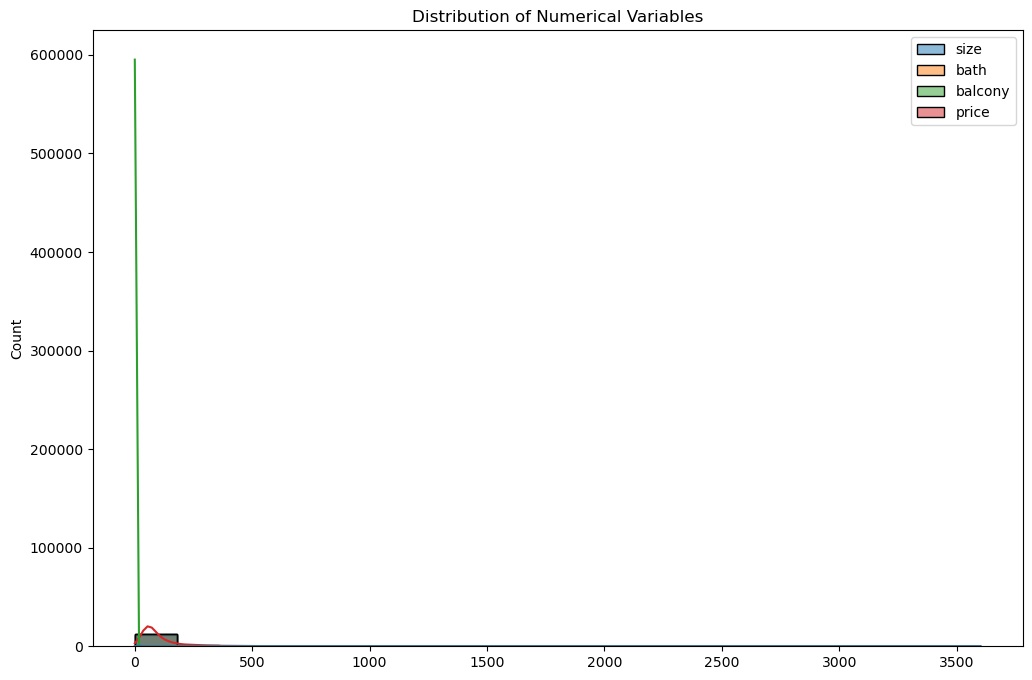

In [24]:
# Histograms for numerical variables
plt.figure(figsize=(12, 8))
sns.histplot(data=df[['size', 'bath', 'balcony', 'price']], bins=20, kde=True)
plt.title('Distribution of Numerical Variables')
plt.show()

In [26]:
# only balconey count is more so not much clear

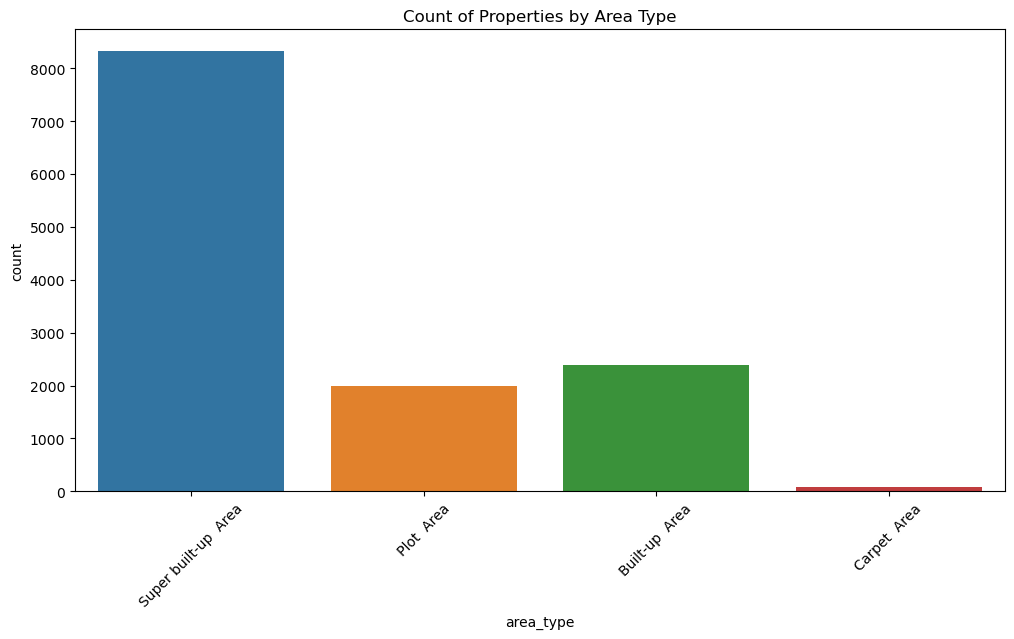

In [25]:
# Bar plot for a categorical variable
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='area_type')
plt.title('Count of Properties by Area Type')
plt.xticks(rotation=45)
plt.show()

In [27]:
# from above graph super built up area count is mopre

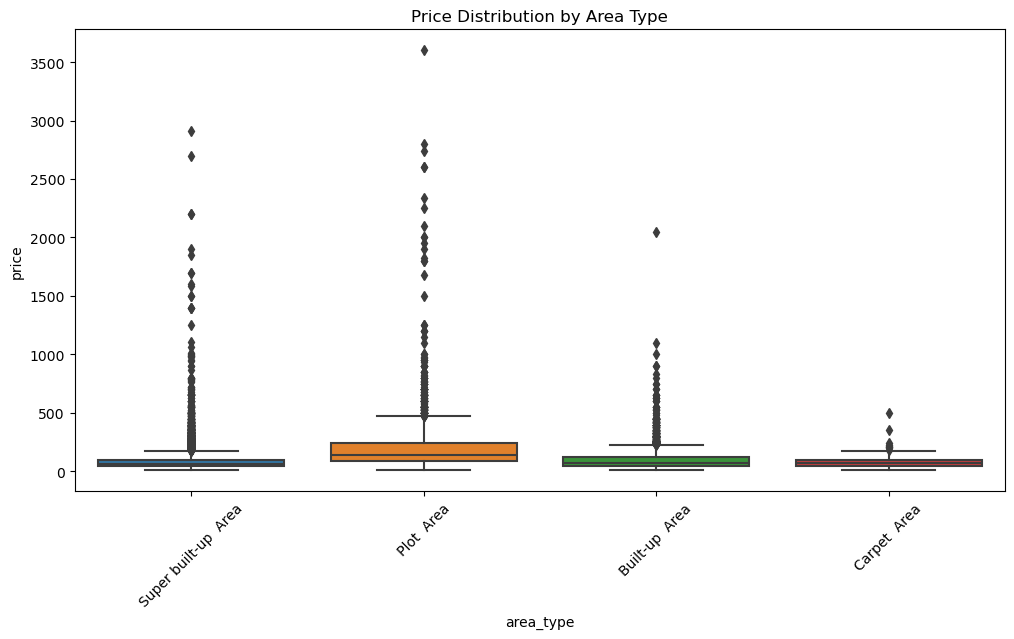

In [28]:
# Boxplot for Price Distribution by Area Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='area_type', y='price')
plt.title('Price Distribution by Area Type')
plt.xticks(rotation=45)
plt.show()

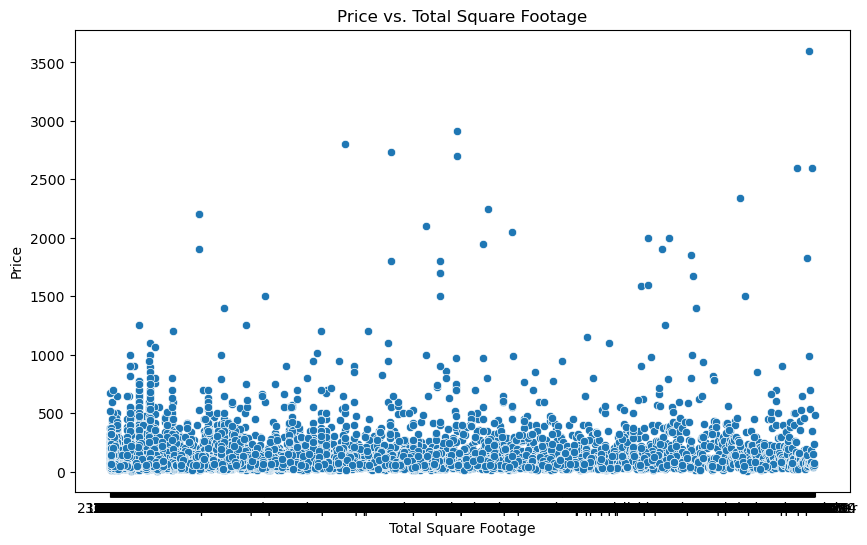

In [29]:
# Scatter Plot for Price vs. Total Square Footage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_sqft', y='price')
plt.title('Price vs. Total Square Footage')
plt.xlabel('Total Square Footage')
plt.ylabel('Price')
plt.show()

In [30]:
columns = df[['area_type','total_sqft']]

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
l=LabelEncoder()
for col in columns:
    df[col]=l.fit_transform(df[col])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12790 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12790 non-null  int32  
 1   availability  12790 non-null  object 
 2   location      12790 non-null  object 
 3   size          12790 non-null  float64
 4   society       12790 non-null  object 
 5   total_sqft    12790 non-null  int32  
 6   bath          12790 non-null  float64
 7   balcony       12790 non-null  float64
 8   price         12790 non-null  float64
dtypes: float64(4), int32(2), object(3)
memory usage: 899.3+ KB


In [34]:
df['availability'].value_counts()

availability
Ready To Move    10171
18-May             292
18-Dec             284
18-Apr             269
18-Aug             187
                 ...  
16-Oct               1
15-Dec               1
15-Jun               1
16-Jul               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [35]:
df['location'].value_counts()

location
Whitefield                        524
Sarjapur  Road                    379
Electronic City                   287
Kanakpura Road                    249
Thanisandra                       229
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [36]:
df.drop(['availability','location','society'],axis=1,inplace=True)

In [37]:
df.head()

,area_type,size,total_sqft,bath,balcony,price
0,3,2.0,70,2.0,1.0,39.07
1,2,4.0,1288,5.0,3.0,120.00
2,0,3.0,514,2.0,3.0,62.00
3,3,3.0,602,3.0,1.0,95.00
4,3,2.0,239,2.0,1.0,51.00


In [38]:
# Divide data into target and feature variable
X = df.drop(['price'],axis=1)
y = df.price

In [39]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test_x=scaler.transform(X_test)

In [43]:
from sklearn.svm import SVR

In [44]:
model = SVR()

In [45]:
model.fit(scaled_train,y_train)

SVR()

In [46]:
from sklearn.metrics import r2_score

In [47]:
y_pred=model.predict(scaled_test_x)

In [50]:
r2_score(y_test,y_pred)

0.20777702983623836

The R-squared (R2) score of approximately 0.208 indicates that the model explains about 20.8% of the variance in the target variable

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
